In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family = 'AppleGothic') #Mac / Windows는 Malgun Gothic

/var/folders/kg/xp1kxddd3r365qjsy8z_p9lh0000gn/T/ipykernel_10062/1285666619.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('tour_review_backup.csv')
df

,rating,user,category,age,date,review,review_category
0,5.0,yjo****,가족여행으로 좋아요,50대,2024.02.21,알찬구성으로 재밌고볼거리다양해요 너무타이트하지도않고 지루하지않게 잠깐잠깐의휴식이나자...,호텔이 관광지와 가까워요\n객실 뷰가 좋아요\n객실이 깨끗해요\n일정이 알차요\n식...
1,4.0,dhl***,가족여행으로 좋아요,40대,2024.02.19,어르신 모시고 여행하기 좋습니다. 워낙 관광객이 많은 곳이라 아침 일찍부터 저녁 늦...,일정이 알차요\n현지 음식이 맛있어요\n호텔이 관광지와 가까워요\n가격만큼 가치 있어요
2,4.0,아자,친구모임으로 좋아요,50대,2024.02.15,딸과 둘이 떠난 여행이라 더 뜻 깊었던 여행이었고 같이 여행한 팀원들도 모두 괜찮은...,호텔이 관광지와 가까워요\n일정이 여유로워요\n현지 음식이 맛있어요\n즐길 거리가 ...
3,5.0,qow*******,커플여행으로 좋아요,20대,2024.02.12,와이프와 결혼해서 처음가는 해외여행 기대반 설레임 반으로 하나투어 강혜원가이드님을 ...,일정이 알차요\n가이드가 전문적이에요\n가이드가 열정적이에요\n가이드가 배려 깊고 ...
4,4.0,ban******,가족여행으로 좋아요,40대,2024.02.12,즐거운 여행이었어요~,호텔이 관광지와 가까워요\n일정이 여유로워요\n현지 음식이 다양해요\n가이드가 전문...
...,...,...,...,...,...,...,...
1975,NaN,hyu****,기타,2012.05.08,2012.05.08,"베트남의 숨겨진 보석 다낭, 호이안, 후에를 다녀왔어요~~ 바쁜 일상에서 탈출을 꿈...",NaN
1976,NaN,하나투어 회원,기타,2012.05.04,2012.05.04,"멋진 곳입니다. 이번에 오랫만에, 아니 첨으로 우리 4가족이 다낭, 호이안, 후에에...",NaN
1977,NaN,하나투어 회원,기타,2012.04.24,2012.04.24,上有天堂 下有 다낭 후에 세계2위 커피생산국 배트남 유럽과 부라질 커피가 가슴과 눈...,NaN
1978,NaN,하나투어 회원,기타,2012.04.15,2012.04.15,베트남 중부의 매력에 푹 빠진 멋진 여행 베트남 중부에 대한 막연한 기대를 가지고 ...,NaN


In [4]:
# 1. 카테고리별 리뷰 수 시각화
# 각 카테고리(가족여행, 친구모임, 커플여행 등) 별로 리뷰 수를 시각화해보고, 어떤 여행 유형이 가장 많은지 알아봅니다.

# 카테고리별 리뷰 수 계산
category_count = df['category'].value_counts()
category_count

category
기타               768
가족여행으로 좋아요       695
아동동반 여행으로 좋아요    274
친구모임으로 좋아요       104
커플여행으로 좋아요        88
나홀로 여행으로 좋아요      51
Name: count, dtype: int64

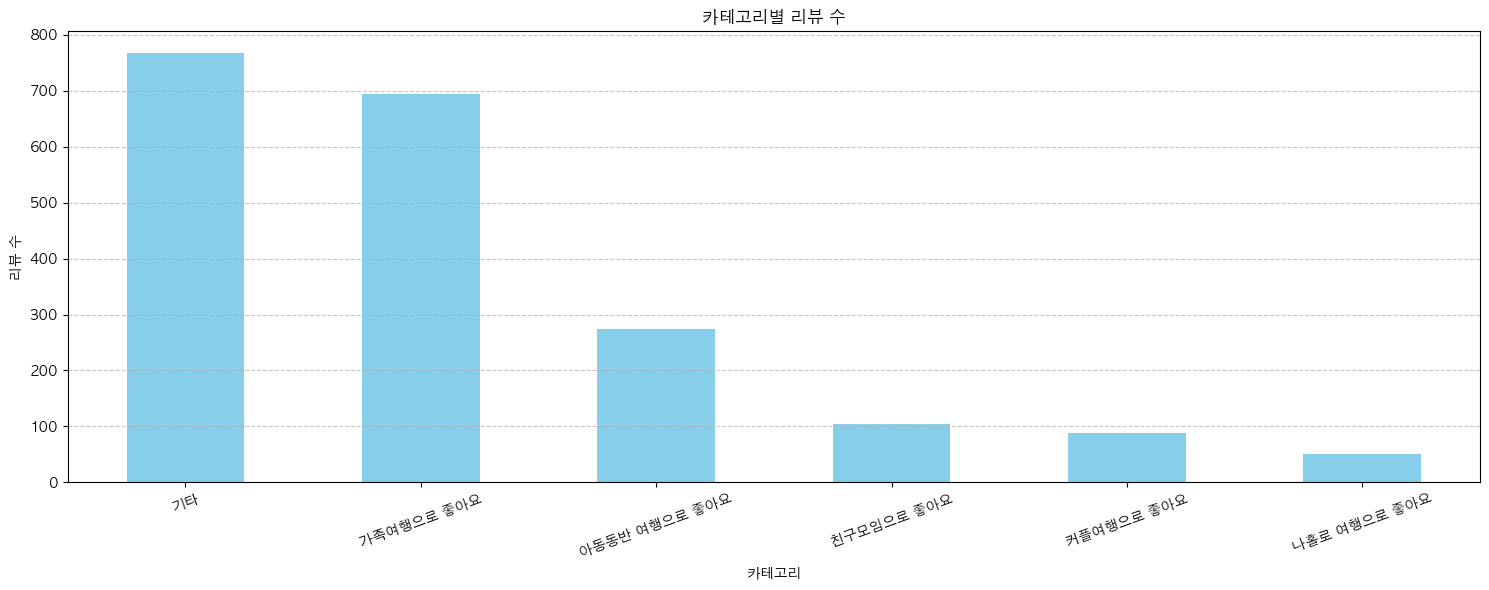

In [6]:
plt.figure(figsize=(15, 6))
category_count.plot(kind='bar', color ='skyblue')

plt.title("카테고리별 리뷰 수")
plt.xlabel("카테고리")
plt.ylabel("리뷰 수")
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
# 2. 날짜별 리뷰 분포 시각화
# 날짜별로 리뷰가 어떻게 분포되어있는지 시각화해서 특정 날짜에 리뷰가 많거나, 적은 때를 확인
# 날짜를 datetime 형식으로 변환
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'])

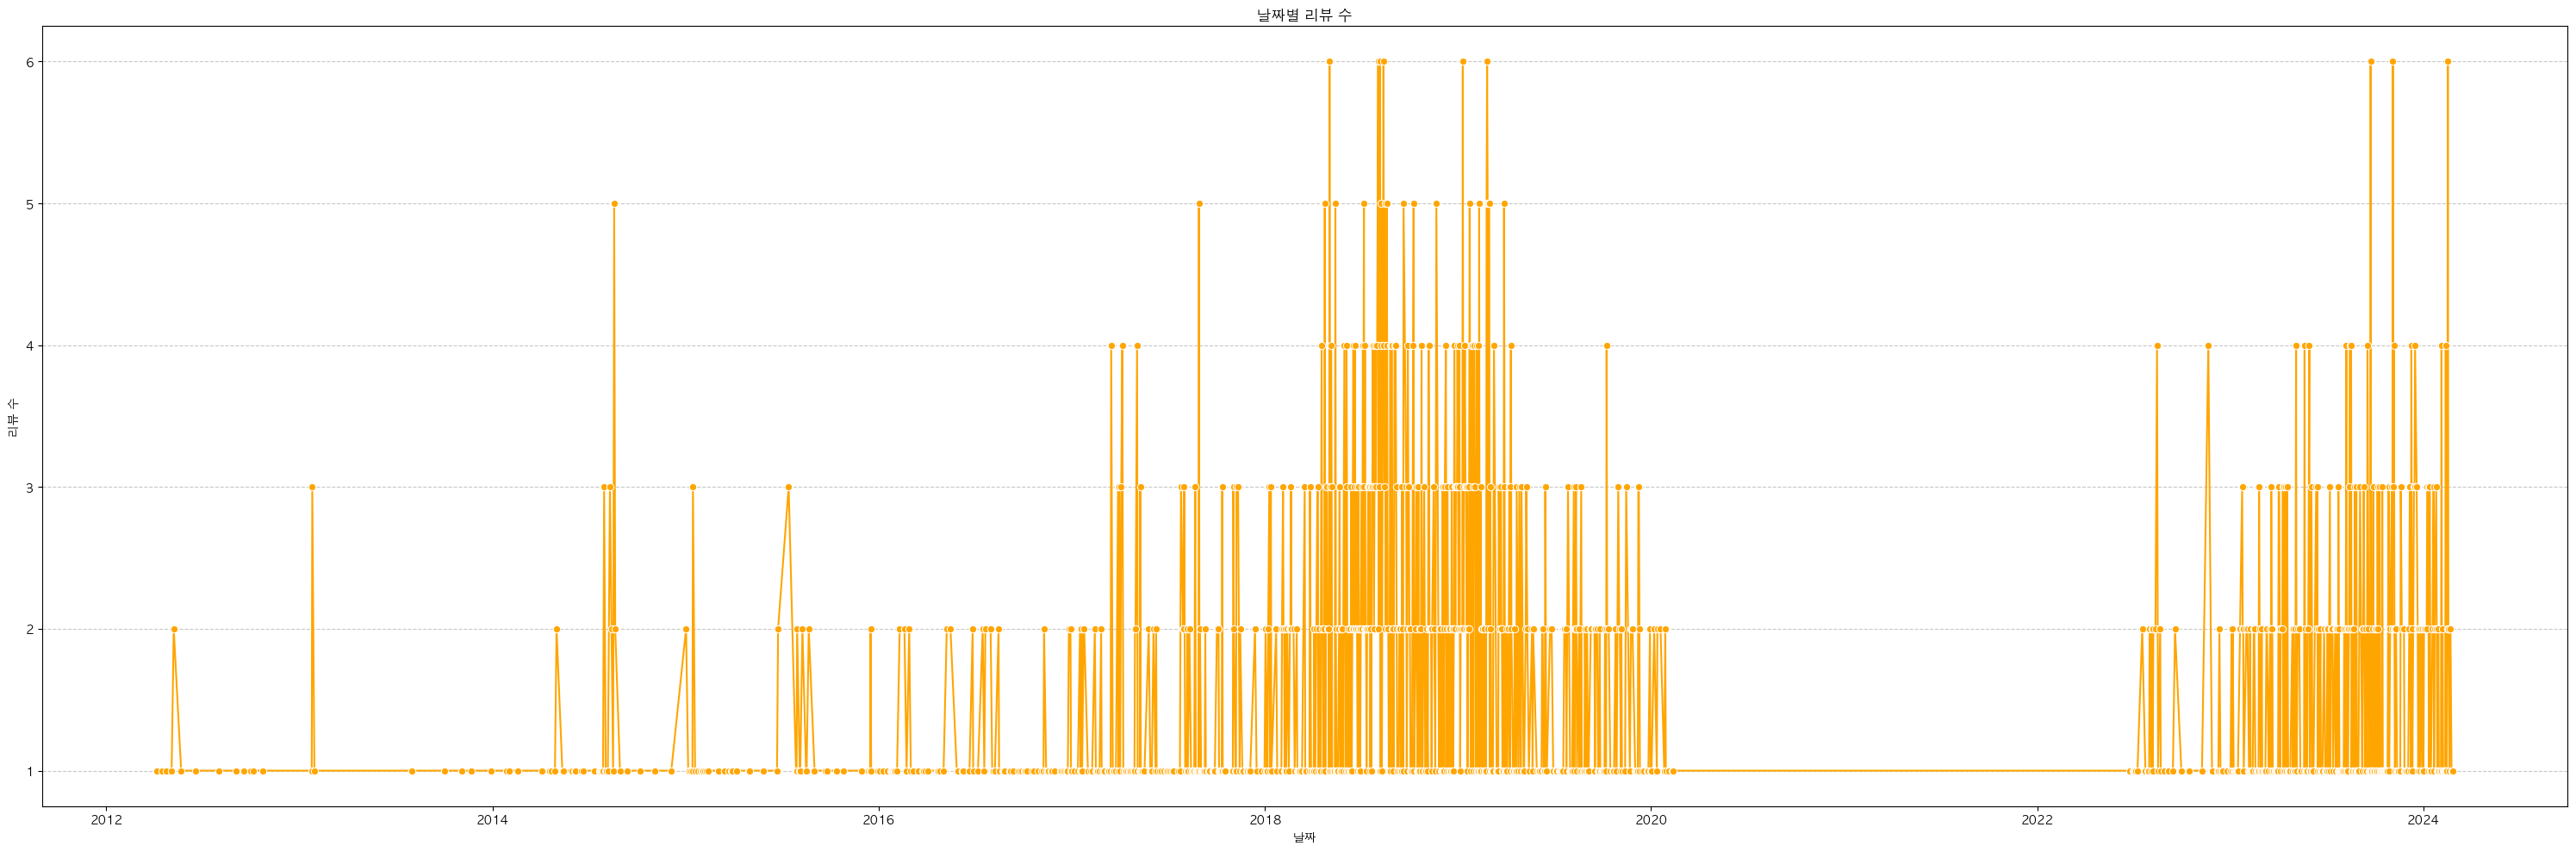

In [17]:
#날짜별 리뷰 수 계산
date_counts = df['date'].value_counts().sort_index()

plt.figure(figsize=(30, 10))
sns.lineplot(x=date_counts.index, y=date_counts.values, marker='o', color='orange')

plt.title('날짜별 리뷰 수')
plt.xlabel('날짜')
plt.ylabel('리뷰 수')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

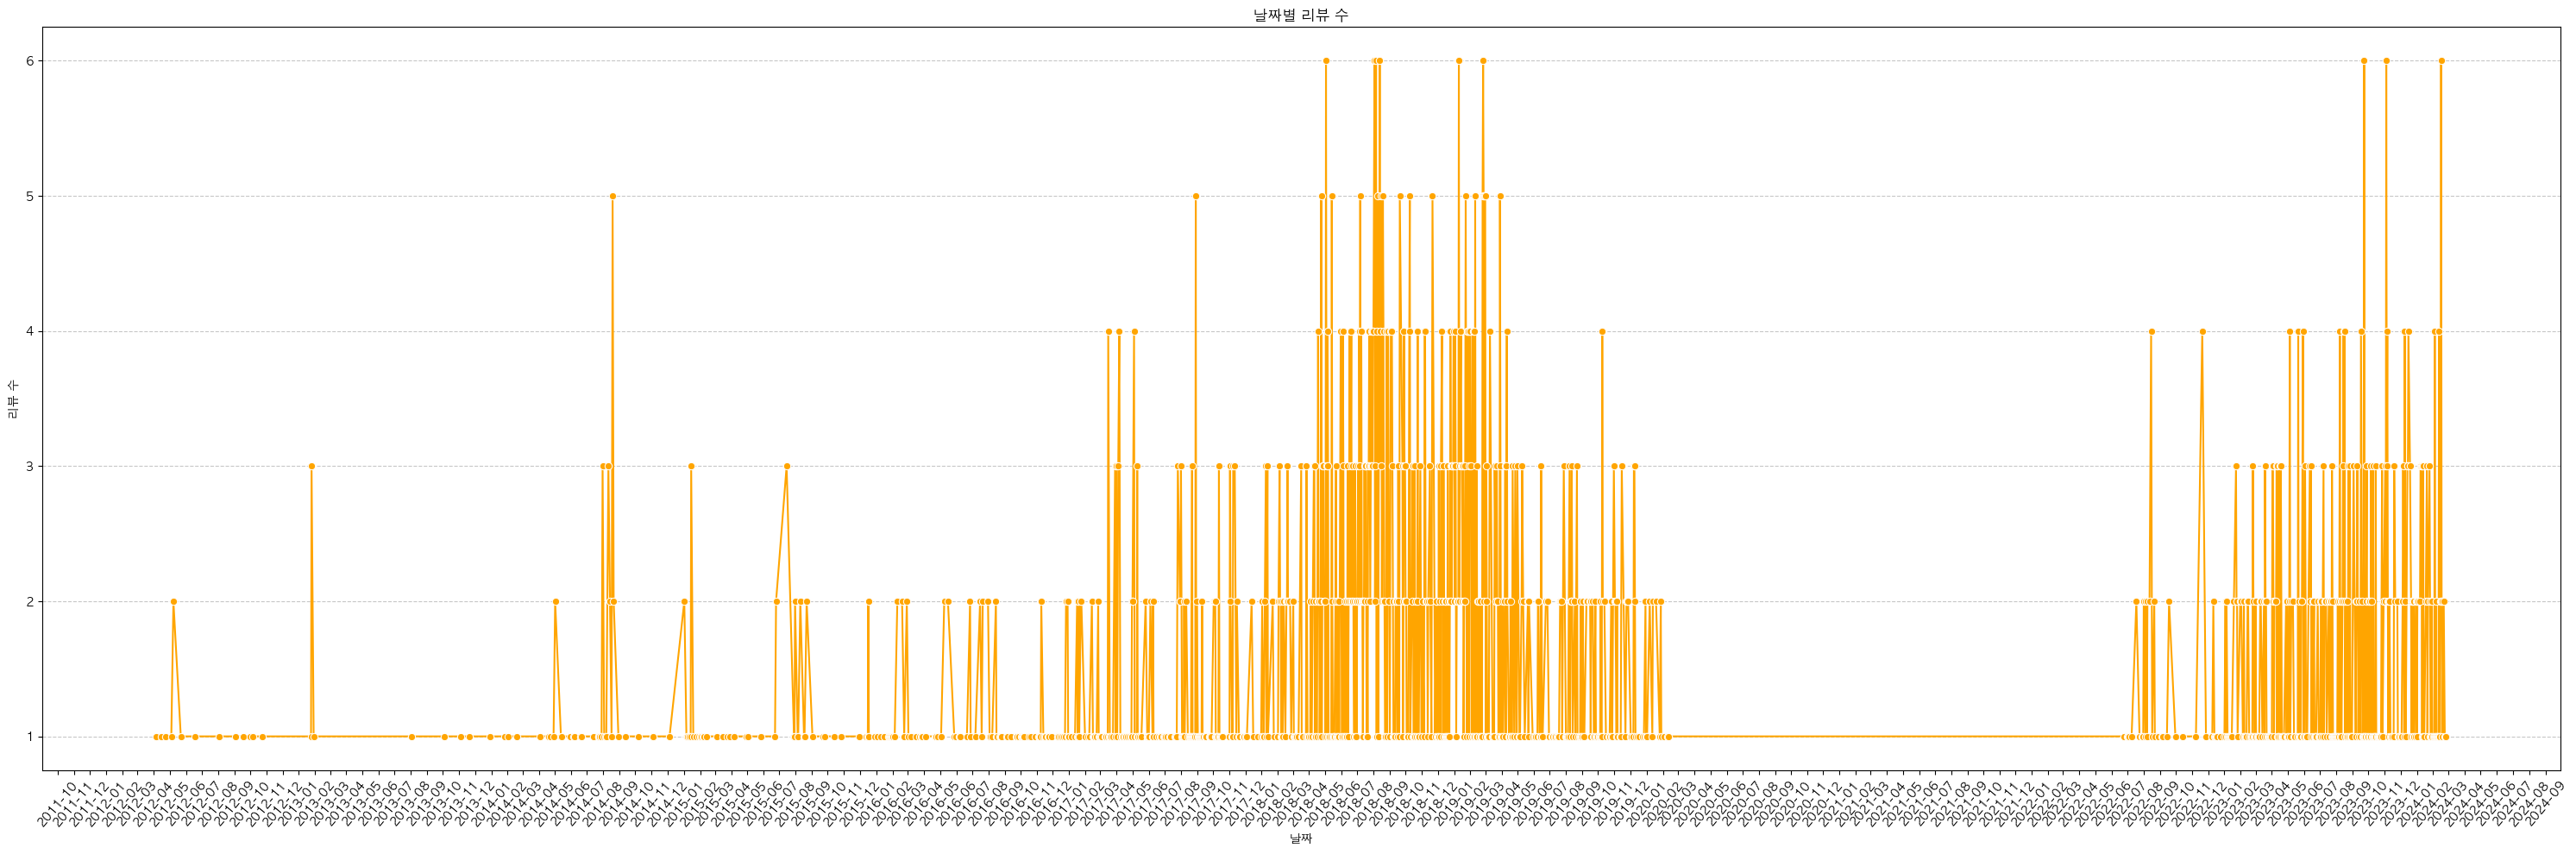

In [20]:
#날짜별 리뷰 수 계산
date_counts = df['date'].value_counts().sort_index()

plt.figure(figsize=(30, 10))
sns.lineplot(x=date_counts.index, y=date_counts.values, marker='o', color='orange')

plt.title('날짜별 리뷰 수')
plt.xlabel('날짜')
plt.ylabel('리뷰 수')

# xticks에 날짜 형식 설정
date_format = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.xticks(rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/kg/xp1kxddd3r365qjsy8z_p9lh0000gn/T/ipykernel_10062/1991126994.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_rating.index, y=age_rating.values, palette='viridis')


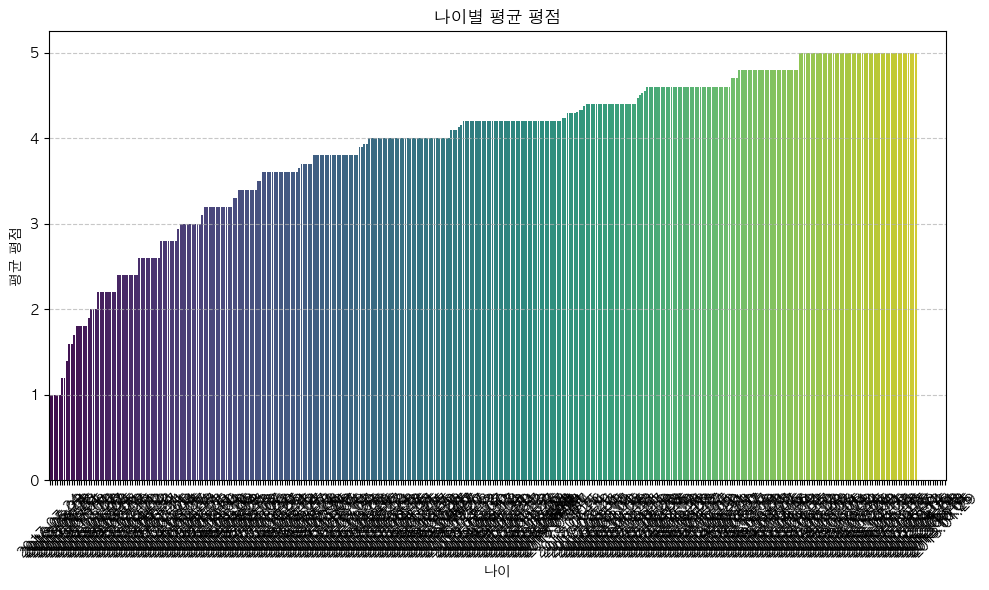

In [22]:
# 3. 나이별 평균 평점 비교
# 각 연령대별로 평균 평점을 비교해서 어떤 연령대가 평균적으로 좋은 리뷰를 남기는지 확인합니다.

# 나이별 평균 평점 계산
age_rating = df.groupby('age')['rating'].mean().sort_values()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=age_rating.index, y=age_rating.values, palette='viridis')

plt.title('나이별 평균 평점')
plt.xlabel('나이')
plt.ylabel('평균 평점')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [23]:
df

,rating,user,category,age,date,review,review_category
0,5.0,yjo****,가족여행으로 좋아요,50대,2024-02-21,알찬구성으로 재밌고볼거리다양해요 너무타이트하지도않고 지루하지않게 잠깐잠깐의휴식이나자...,호텔이 관광지와 가까워요\n객실 뷰가 좋아요\n객실이 깨끗해요\n일정이 알차요\n식...
1,4.0,dhl***,가족여행으로 좋아요,40대,2024-02-19,어르신 모시고 여행하기 좋습니다. 워낙 관광객이 많은 곳이라 아침 일찍부터 저녁 늦...,일정이 알차요\n현지 음식이 맛있어요\n호텔이 관광지와 가까워요\n가격만큼 가치 있어요
2,4.0,아자,친구모임으로 좋아요,50대,2024-02-15,딸과 둘이 떠난 여행이라 더 뜻 깊었던 여행이었고 같이 여행한 팀원들도 모두 괜찮은...,호텔이 관광지와 가까워요\n일정이 여유로워요\n현지 음식이 맛있어요\n즐길 거리가 ...
3,5.0,qow*******,커플여행으로 좋아요,20대,2024-02-12,와이프와 결혼해서 처음가는 해외여행 기대반 설레임 반으로 하나투어 강혜원가이드님을 ...,일정이 알차요\n가이드가 전문적이에요\n가이드가 열정적이에요\n가이드가 배려 깊고 ...
4,4.0,ban******,가족여행으로 좋아요,40대,2024-02-12,즐거운 여행이었어요~,호텔이 관광지와 가까워요\n일정이 여유로워요\n현지 음식이 다양해요\n가이드가 전문...
...,...,...,...,...,...,...,...
1975,NaN,hyu****,기타,2012.05.08,2012-05-08,"베트남의 숨겨진 보석 다낭, 호이안, 후에를 다녀왔어요~~ 바쁜 일상에서 탈출을 꿈...",NaN
1976,NaN,하나투어 회원,기타,2012.05.04,2012-05-04,"멋진 곳입니다. 이번에 오랫만에, 아니 첨으로 우리 4가족이 다낭, 호이안, 후에에...",NaN
1977,NaN,하나투어 회원,기타,2012.04.24,2012-04-24,上有天堂 下有 다낭 후에 세계2위 커피생산국 배트남 유럽과 부라질 커피가 가슴과 눈...,NaN
1978,NaN,하나투어 회원,기타,2012.04.15,2012-04-15,베트남 중부의 매력에 푹 빠진 멋진 여행 베트남 중부에 대한 막연한 기대를 가지고 ...,NaN


/var/folders/kg/xp1kxddd3r365qjsy8z_p9lh0000gn/T/ipykernel_10062/2580137245.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_ratings_new.index, y=age_ratings_new.values, palette='viridis')


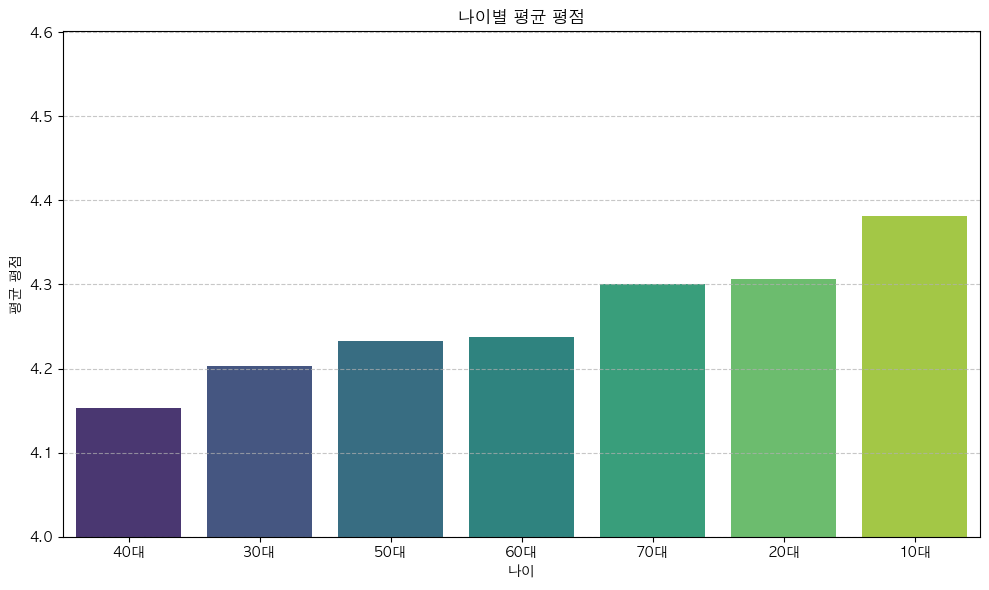

In [27]:
df_age = df[df['age'].str.endswith('대')]
df_age = df_age[df_age['rating'].notnull()]

#나이별 평균 평점 계산
age_ratings_new = df_age.groupby('age')['rating'].mean().sort_values()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=age_ratings_new.index, y=age_ratings_new.values, palette='viridis')

plt.title('나이별 평균 평점')
plt.xlabel('나이')
plt.ylabel('평균 평점')

#y축 범위 설정
plt.ylim(4, None)

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/kg/xp1kxddd3r365qjsy8z_p9lh0000gn/T/ipykernel_10062/1712825718.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_ratings_new.index, y=age_ratings_new.values, palette='viridis')


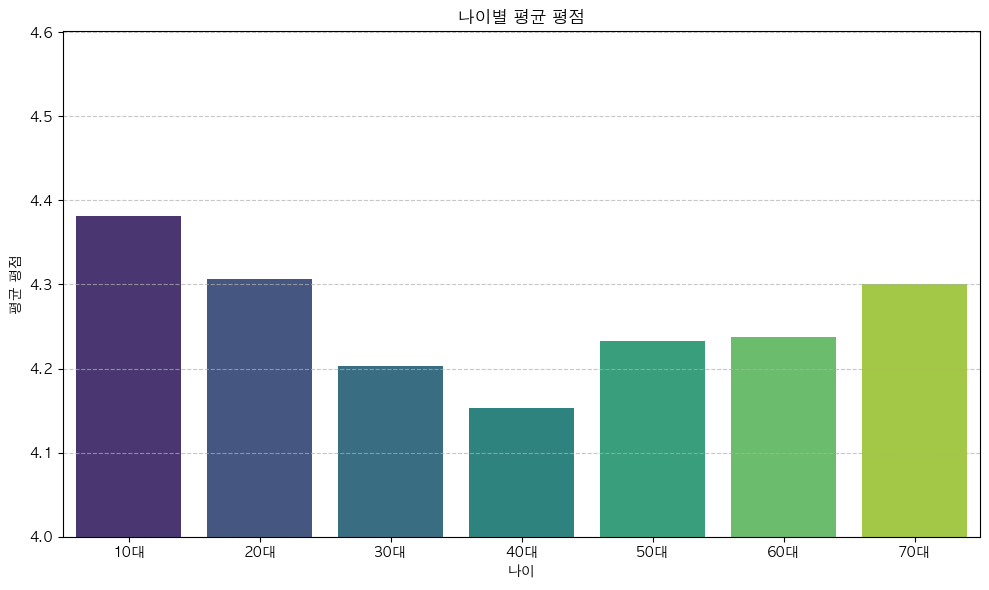

In [30]:
age_ratings_new = age_ratings_new.sort_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=age_ratings_new.index, y=age_ratings_new.values, palette='viridis')

plt.title('나이별 평균 평점')
plt.xlabel('나이')
plt.ylabel('평균 평점')

#y축 범위 설정
plt.ylim(4, None)

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()